# Проект 3. Определение перспективного тарифа для телеком компании

## 1. Предобработка данных и предварительный анализ

### Изучение информации о файлах данных

Последовательно посмотрим на 5 датасетов.  
Какая информация о пользователях у нас есть?

In [1]:
import pandas as pd
users = pd.read_csv('/datasets/users.csv')
print(users.head())
print(users.info())

   user_id  age churn_date         city first_name  last_name    reg_date  \
0     1000   52        NaN    Краснодар     Рафаил  Верещагин  2018-05-25   
1     1001   41        NaN       Москва       Иван       Ежов  2018-11-01   
2     1002   59        NaN  Стерлитамак    Евгений  Абрамович  2018-06-17   
3     1003   23        NaN       Москва      Белла   Белякова  2018-08-17   
4     1004   68        NaN  Новокузнецк    Татьяна   Авдеенко  2018-05-14   

  tariff  
0  ultra  
1  smart  
2  smart  
3  ultra  
4  ultra  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.3+ KB
None


Итак, у нас есть 500 пользователей, пропущенные значения есть только столбце с информацией о дате прекращения использования тарифа, что нормально.

Для дальнейшего анализа нам критически важны следующие параметры в этом датасете:  
- отсутствие дубликатов среди пользователей (проверим по user_id);
- отсутствие дубликатов в написании тарифов (четко два варианта);
- отсутствие дубликатов в написании регионов (по крайней мере, для Москвы).  

Помимо этого, на всякий случай приведем к формату даты столбцы reg_date и churn_date.

In [2]:
print(len(users['user_id'].unique()))

500


Длина списка уникальных значений user_id 500, значит, дубликатов нет.

In [3]:
print(users['tariff'].value_counts())

smart    351
ultra    149
Name: tariff, dtype: int64


Здесь все корректно!

In [4]:
print(users['city'].unique())

['Краснодар' 'Москва' 'Стерлитамак' 'Новокузнецк' 'Набережные Челны'
 'Ульяновск' 'Челябинск' 'Пермь' 'Тюмень' 'Самара' 'Санкт-Петербург'
 'Иваново' 'Чебоксары' 'Омск' 'Уфа' 'Томск' 'Чита' 'Мурманск'
 'Петрозаводск' 'Тверь' 'Екатеринбург' 'Махачкала' 'Вологда' 'Череповец'
 'Ярославль' 'Сочи' 'Хабаровск' 'Ставрополь' 'Рязань' 'Улан-Удэ' 'Тула'
 'Саратов' 'Ростов-на-Дону' 'Казань' 'Иркутск' 'Курск' 'Калуга' 'Якутск'
 'Астрахань' 'Химки' 'Владикавказ' 'Волгоград' 'Саранск' 'Ижевск'
 'Новосибирск' 'Брянск' 'Тольятти' 'Нижний Тагил' 'Орёл' 'Белгород'
 'Воронеж' 'Волжский' 'Курган' 'Барнаул' 'Красноярск' 'Архангельск'
 'Липецк' 'Кемерово' 'Киров' 'Сургут' 'Пенза' 'Магнитогорск'
 'Нижний Новгород' 'Кострома' 'Владивосток' 'Тамбов' 'Балашиха'
 'Севастополь' 'Калининград' 'Оренбург' 'Смоленск' 'Нижневартовск'
 'Владимир' 'Новороссийск' 'Грозный' 'Подольск']


Дубликатов не видно.

Заменим пропущенные значения в столбце churn_date на 2019-01-01, ведь в этот день тариф еще будет подключен.  
Затем приведем столбцы к формату даты.

In [5]:
users = users.fillna('2019-01-01')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
print(users.head(15))
print(users.info())

    user_id  age churn_date              city first_name  last_name  \
0      1000   52 2019-01-01         Краснодар     Рафаил  Верещагин   
1      1001   41 2019-01-01            Москва       Иван       Ежов   
2      1002   59 2019-01-01       Стерлитамак    Евгений  Абрамович   
3      1003   23 2019-01-01            Москва      Белла   Белякова   
4      1004   68 2019-01-01       Новокузнецк    Татьяна   Авдеенко   
5      1005   67 2019-01-01  Набережные Челны   Афанасий     Горлов   
6      1006   21 2019-01-01         Ульяновск     Леонид   Ермолаев   
7      1007   65 2019-01-01            Москва        Юна   Березина   
8      1008   63 2019-01-01         Челябинск     Рустэм  Пономарёв   
9      1009   24 2019-01-01             Пермь   Василиса    Блинова   
10     1010   26 2019-01-01            Тюмень     Эдуард    Кононов   
11     1011   44 2019-01-01            Самара   Веселина     Алёшко   
12     1012   38 2019-01-01   Санкт-Петербург     Варлам   Соловьев   
13    

Теперь столбцы с датами в нужном формате.  
Посмотрим на максимальное и минимальное значение даты подключения.

In [6]:
print(users['reg_date'].min())
print(users['reg_date'].max())

2018-01-01 00:00:00
2018-12-31 00:00:00


Посмотрим на данные о звонках.

In [7]:
calls = pd.read_csv('/datasets/calls.csv')
print(calls.head())
print(calls.info())

       id   call_date  duration  user_id
0  1000_0  2018-07-25      0.00     1000
1  1000_1  2018-08-17      0.00     1000
2  1000_2  2018-06-11      2.85     1000
3  1000_3  2018-09-21     13.80     1000
4  1000_4  2018-12-15      5.18     1000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


Здесь нам важны все столбцы, кроме id.  
Сделаем следующее:
- проверим диапазон значений и количество уникальных значений в столбце user_id;
- изменим формат столбца call_date;
- разберемся в выбросами (если есть) и нулевыми значениями в столбце duration.

In [8]:
print(calls['user_id'].min())
print(calls['user_id'].max())
print(len(calls['user_id'].unique()))

1000
1499
492


Данные о звонках есть не для всех абонентов, но в целом данные выглядят нормально.

In [9]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
print(calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB
None


In [10]:
print(calls[calls['duration'] == 0]['duration'].count())

39613


Почти 20% звонков имеют нулевое значение.  
Есть два варианта решения:
- удалить эти записи как ошибочные;
- предположить, что это очень короткие звонки, и с учетом того, что Мегалайн округляет звонки до минуты, перекодировать их как одноминутные звонки.  

В соответствии с дополнительной информацией, в базе нет неотвеченных звонков, таким образом, все необходимо тарифицировать.  
Тем не менее, взглянем на распределение.

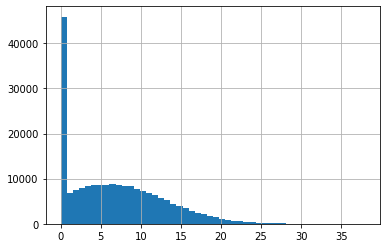

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
calls['duration'].hist(bins=50)

Большая часть звонков - менее 15 минут, а почти все короче 25 минут, что выглядит логично.  
Посмотрим на распределение звонков длительностью до 20 минут без нулевых значений, чтобы понять, как выглядит распределение без них.

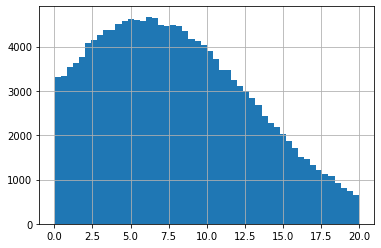

In [12]:
calls['duration'].hist(bins=50, range=(0.01,20))

По понятным причинам, распределение не является нормальным, "скошено" вправо: много небольших по длительности звонковб и есть длинный хвост более продолжительных звонков. К ним придется добавить нулевые по длительности звонки.  
В реальном проекте стоило бы уточнить у поставщиков данных, как появились нулевые значения.   
Посмотрим на максимальные значения, чтобы понять, нуждаются ли они в корректировке.

In [13]:
calls['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

Нет, максимальное значение вполне укладывается в допустимый диапазон.  
Создадим столбец, в котором округлим значения длительности до разговоров до целого числа в большую сторону (по правилам оператора Мегалайн), а также перекодируем 0 в 1. Затем переведем столбец к формату целых чисел.

In [14]:
import math
def duration_correct(duration):
    if duration == 0:
        return 1
    else:
        return math.ceil(duration)
calls['duration_correct'] = calls['duration'].apply(duration_correct)
calls['duration_correct'] = calls['duration_correct'].astype(int)
print(calls.head(15))
print(calls.info())

         id  call_date  duration  user_id  duration_correct
0    1000_0 2018-07-25      0.00     1000                 1
1    1000_1 2018-08-17      0.00     1000                 1
2    1000_2 2018-06-11      2.85     1000                 3
3    1000_3 2018-09-21     13.80     1000                14
4    1000_4 2018-12-15      5.18     1000                 6
5    1000_5 2018-11-02      0.00     1000                 1
6    1000_6 2018-10-18      0.00     1000                 1
7    1000_7 2018-08-22     18.31     1000                19
8    1000_8 2018-09-15     18.44     1000                19
9    1000_9 2018-08-15      0.00     1000                 1
10  1000_10 2018-08-22      5.03     1000                 6
11  1000_11 2018-05-28     18.82     1000                19
12  1000_12 2018-07-05      2.02     1000                 3
13  1000_13 2018-09-29      7.15     1000                 8
14  1000_14 2018-12-11      9.13     1000                10
<class 'pandas.core.frame.DataFrame'>
Ra

Переходим к таблице к сообщениям.

In [15]:
messages = pd.read_csv('/datasets/messages.csv')
print(messages.head(15))
print(messages.info())

         id message_date  user_id
0    1000_0   2018-06-27     1000
1    1000_1   2018-10-08     1000
2    1000_2   2018-08-04     1000
3    1000_3   2018-06-16     1000
4    1000_4   2018-12-05     1000
5    1000_5   2018-06-20     1000
6    1000_6   2018-11-19     1000
7    1000_7   2018-10-29     1000
8    1000_8   2018-06-25     1000
9    1000_9   2018-12-18     1000
10  1000_10   2018-05-30     1000
11  1000_11   2018-07-06     1000
12  1000_12   2018-08-20     1000
13  1000_13   2018-10-30     1000
14  1000_14   2018-09-14     1000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None


Убедимся, что со столбцом user_id все в порядке.

In [16]:
print(messages['user_id'].min())
print(messages['user_id'].max())
print(len(messages['user_id'].unique()))

1000
1499
426


Перекодируем столбец message_date.

In [17]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
print(messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB
None


Проверим датасет с данными по использованию интернета.

In [18]:
internet = pd.read_csv('/datasets/internet.csv')
print(internet.head(15))
print(internet.info())

         id  mb_used session_date  user_id
0    1000_0   112.95   2018-11-25     1000
1    1000_1  1052.81   2018-09-07     1000
2    1000_2  1197.26   2018-06-25     1000
3    1000_3   550.27   2018-08-22     1000
4    1000_4   302.56   2018-09-24     1000
5    1000_5   399.97   2018-10-02     1000
6    1000_6   540.08   2018-09-07     1000
7    1000_7   415.70   2018-07-11     1000
8    1000_8   505.40   2018-10-08     1000
9    1000_9   345.54   2018-09-03     1000
10  1000_10   385.14   2018-09-27     1000
11  1000_11     0.00   2018-08-28     1000
12  1000_12   375.87   2018-06-20     1000
13  1000_13   393.83   2018-08-09     1000
14  1000_14   180.64   2018-08-11     1000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory

Убедимся, что со столбцом user_id все в порядке.

In [19]:
print(internet['user_id'].min())
print(internet['user_id'].max())
print(len(internet['user_id'].unique()))

1000
1499
497


Приведем столбец session_date к формату даты.

In [20]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
print(internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB
None


Поработаем со столбцом mb_used. Здесь также есть нулевые сессии, и стоит проверить на выбросы максимальные значения.

In [21]:
internet['mb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

Максимальная сессия 1,7 Гб выглядит вполне приемлемой.  
Посмотрим на количество нулевых значений.

In [22]:
print(internet[internet['mb_used'] == 0]['mb_used'].count())

19598


Таких значений достаточно много. Посмотрим на распределение, чтобы понять, как оно выглядит без нулевых значений.

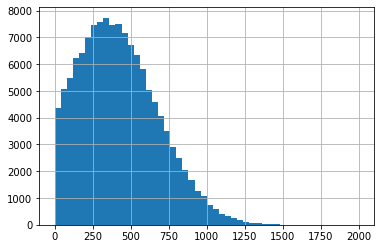

In [23]:
internet['mb_used'].hist(bins=50, range=(0.01,2000))

Добавление нулевых значений к какому-либо значению (1 Мб, например) исказит распределение.  
Но следуя логике исправления нулевых звонков, предположим, что это очень короткие сессии, и засчитаем их по принципам Мегалайна за 1 Мб.

Создадим столбец, в котором округлим значения до целого числа в большую сторону (по правилам оператора Мегалайн), а также перекодируем 0 к 1.

In [24]:
import math
def mb_used_correct(mb_used):
    if mb_used == 0:
        return 1
    else:
        return math.ceil(mb_used)
internet['mb_used_correct'] = internet['mb_used'].apply(mb_used_correct)
internet['mb_used_correct'] = internet['mb_used_correct'].astype(int)
print(internet.head(15))
print(internet.info())

         id  mb_used session_date  user_id  mb_used_correct
0    1000_0   112.95   2018-11-25     1000              113
1    1000_1  1052.81   2018-09-07     1000             1053
2    1000_2  1197.26   2018-06-25     1000             1198
3    1000_3   550.27   2018-08-22     1000              551
4    1000_4   302.56   2018-09-24     1000              303
5    1000_5   399.97   2018-10-02     1000              400
6    1000_6   540.08   2018-09-07     1000              541
7    1000_7   415.70   2018-07-11     1000              416
8    1000_8   505.40   2018-10-08     1000              506
9    1000_9   345.54   2018-09-03     1000              346
10  1000_10   385.14   2018-09-27     1000              386
11  1000_11     0.00   2018-08-28     1000                1
12  1000_12   375.87   2018-06-20     1000              376
13  1000_13   393.83   2018-08-09     1000              394
14  1000_14   180.64   2018-08-11     1000              181
<class 'pandas.core.frame.DataFrame'>
Ra

Наконец, взглянем на последний датасет с информацией о тарифах.

In [25]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### Подготовка сводных таблиц с данными по абонентам

Количество сделанных звонков и израсходованных минут разговора по месяцам.  
Создадим столбец с номером месяца.

In [26]:
calls['calls_month'] = calls['call_date'].dt.month
calls.head()

,id,call_date,duration,user_id,duration_correct,calls_month
0,1000_0,2018-07-25,0.00,1000,1,7
1,1000_1,2018-08-17,0.00,1000,1,8
2,1000_2,2018-06-11,2.85,1000,3,6
3,1000_3,2018-09-21,13.80,1000,14,9
4,1000_4,2018-12-15,5.18,1000,6,12


Создадим сводную таблицу с количеством звонков для каждого абонента.

In [27]:
calls_number = calls.pivot_table(index='user_id', columns='calls_month', values='duration_correct', aggfunc='count', fill_value=0)
print(calls_number.head(15))

calls_month  1   2   3    4   5   6   7   8    9    10   11   12
user_id                                                         
1000          0   0   0    0  22  43  47  52   58   57   43   46
1001          0   0   0    0   0   0   0   0    0    0   59   63
1002          0   0   0    0   0  15  26  42   36   33   32   33
1003          0   0   0    0   0   0   0  55  134  108  115  108
1004          0   0   0    0   9  31  22  19   26   29   19   21
1005         15  69  77  101  73  80  77  71   66  100   75   84
1006          0   3  46   47  56  53  49  42   54   44   62   50
1007          0   0   0   25  67  68  69  74   87   69   81   72
1008          0   0   0    0   0   0   0   0    0    0    0   52
1009          0   0  13   39  28  31  22  33   25   28   39   32
1010          0   0   0    0   0   0   0  19   29   36   39   32
1011          0   0  23   62  56  68  73  74   65   76   65   58
1012          0   0   5   44  43  29  43  30   30   48   25   43
1013          0   0   0  

Добавим столбцы с общим количеством звонков за год и среднемесячным количеством звонков (только по тем месяцам, когда были звонки). Необходима корректировка на длительность использования тарифа в первый месяц при подсчете среднего, но для общего понимания результатов этого достаточно.

In [28]:
calls_number['year']=calls_number.sum(axis=1)
calls_number['monthly_calls_number']=calls_number['year'] / calls_number.iloc[:,:-1].gt(0).sum(axis=1)
calls_number.head(15)

calls_month,1,2,3,4,5,6,7,8,9,10,11,12,year,monthly_calls_number
user_id,,,,,,,,,,,,,,
1000,0,0,0,0,22,43,47,52,58,57,43,46,368,46.0
1001,0,0,0,0,0,0,0,0,0,0,59,63,122,61.0
1002,0,0,0,0,0,15,26,42,36,33,32,33,217,31.0
1003,0,0,0,0,0,0,0,55,134,108,115,108,520,104.0
1004,0,0,0,0,9,31,22,19,26,29,19,21,176,22.0
1005,15,69,77,101,73,80,77,71,66,100,75,84,888,74.0
1006,0,3,46,47,56,53,49,42,54,44,62,50,506,46.0
1007,0,0,0,25,67,68,69,74,87,69,81,72,612,68.0
1008,0,0,0,0,0,0,0,0,0,0,0,52,52,52.0


Посмотрим на распределение среднемесячного количества звонков.

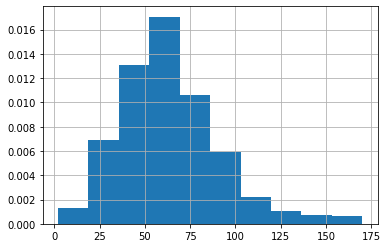

In [29]:
calls_number['monthly_calls_number'].hist(density=True)

Значения укладываются в осмысленный диапазон, распределение несколько скошено вправо.  
Построим сводную таблицу с помесячным количеством израсходованных минут для каждого абонента.

In [30]:
calls_duration = calls.pivot_table(index='user_id', columns='calls_month', values='duration_correct', aggfunc='sum', fill_value=0)
print(calls_duration.head(15))

calls_month  1    2    3    4    5    6    7    8    9    10   11   12
user_id                                                               
1000          0    0    0    0  164  187  346  418  478  363  344  341
1001          0    0    0    0    0    0    0    0    0    0  444  430
1002          0    0    0    0    0  118  219  294  217  221  250  242
1003          0    0    0    0    0    0    0  392  990  866  844  822
1004          0    0    0    0   37  177  137  138  125  153  121  136
1005         99  470  620  736  606  623  584  626  488  745  562  613
1006          0   42  296  365  381  483  327  285  367  276  388  385
1007          0    0    0  202  490  558  589  483  674  481  594  439
1008          0    0    0    0    0    0    0    0    0    0    0  350
1009          0    0  110  328  176  290  185  255  138  219  297  237
1010          0    0    0    0    0    0    0  145  153  255  298  339
1011          0    0  216  391  445  350  518  531  485  645  514  375
1012  

Добавим столбцы с общим количеством минут за год и среднемесячным количеством минут (только по тем месяцам, когда были звонки).

In [31]:
calls_duration['year']=calls_duration.sum(axis=1)
calls_duration['monthly_calls_duration']=calls_duration['year'] / calls_duration.iloc[:,:-1].gt(0).sum(axis=1)
calls_duration.head(15)

calls_month,1,2,3,4,5,6,7,8,9,10,11,12,year,monthly_calls_duration
user_id,,,,,,,,,,,,,,
1000,0,0,0,0,164,187,346,418,478,363,344,341,2641,330.125000
1001,0,0,0,0,0,0,0,0,0,0,444,430,874,437.000000
1002,0,0,0,0,0,118,219,294,217,221,250,242,1561,223.000000
1003,0,0,0,0,0,0,0,392,990,866,844,822,3914,782.800000
1004,0,0,0,0,37,177,137,138,125,153,121,136,1024,128.000000
1005,99,470,620,736,606,623,584,626,488,745,562,613,6772,564.333333
1006,0,42,296,365,381,483,327,285,367,276,388,385,3595,326.818182
1007,0,0,0,202,490,558,589,483,674,481,594,439,4510,501.111111
1008,0,0,0,0,0,0,0,0,0,0,0,350,350,350.000000


Посмотрим на распределение среднемесячной длительности звонков.

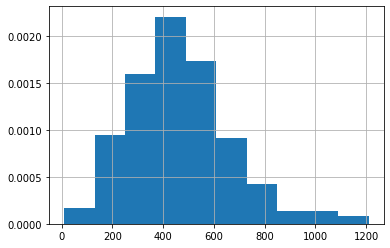

In [32]:
calls_duration['monthly_calls_duration'].hist(density=True)

Распределение ближе к нормальному, чем распределение количества звонков. Есть небольшой "хвост" со значениями более 800 минут разговоров в месяц, но ничего невозможного в этих цифрах нет.

Теперь построим сводную таблицу с количеством отправленных по месяцам сообщений.

In [33]:
messages['message_month'] = messages['message_date'].dt.month
messages_number = messages.pivot_table(index='user_id', columns='message_month', values='id', aggfunc='count', fill_value=0)
messages_number.head(15)

message_month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0,0,0,0,22,60,75,81,57,73,58,70
1002,0,0,0,0,0,4,11,13,4,10,16,12
1003,0,0,0,0,0,0,0,37,91,83,94,75
1004,0,0,0,0,95,134,181,151,146,165,158,162
1005,7,38,56,41,42,47,56,64,52,44,51,54
1007,0,0,0,11,39,26,26,27,31,18,21,26
1008,0,0,0,0,0,0,0,0,0,0,0,56
1009,0,0,2,14,7,14,14,9,12,15,11,12
1011,0,0,4,7,13,13,13,15,10,17,12,6


Добавим аналогичные столбцы, как к таблицам со статистикой по звонкам: общее количество сообщений за год и среднемесячное количество сообщений.

In [34]:
messages_number['year']=messages_number.sum(axis=1)
messages_number['monthly_messages_number']=messages_number['year'] / messages_number.iloc[:,:-1].gt(0).sum(axis=1)
messages_number.head(15)

message_month,1,2,3,4,5,6,7,8,9,10,11,12,year,monthly_messages_number
user_id,,,,,,,,,,,,,,
1000,0,0,0,0,22,60,75,81,57,73,58,70,496,62.0
1002,0,0,0,0,0,4,11,13,4,10,16,12,70,10.0
1003,0,0,0,0,0,0,0,37,91,83,94,75,380,76.0
1004,0,0,0,0,95,134,181,151,146,165,158,162,1192,149.0
1005,7,38,56,41,42,47,56,64,52,44,51,54,552,46.0
1007,0,0,0,11,39,26,26,27,31,18,21,26,225,25.0
1008,0,0,0,0,0,0,0,0,0,0,0,56,56,56.0
1009,0,0,2,14,7,14,14,9,12,15,11,12,110,11.0
1011,0,0,4,7,13,13,13,15,10,17,12,6,110,11.0


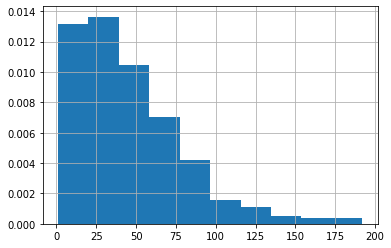

In [35]:
messages_number['monthly_messages_number'].hist(density=True)

Диапазон значений сдвинут выглядит адекватно, и несколько скошен в сторону небольшого количества сообщений.  
Также необходимо иметь в виду, что ряд абонентов не отправили ни одного сообщения, и в этом распределении они отсутствуют.

Построим сводную таблицу со статистикой использования мобильного интернета.  
Пока не будем заполнять нулями пропущенные значения, так как нам предостоит перевести данные к Гб.

In [36]:
internet['month'] = internet['session_date'].dt.month
traffic = internet.pivot_table(index='user_id', columns='month', values='mb_used_correct', aggfunc='sum')
print(traffic.head(15))

month        1       2        3        4        5        6        7        8   \
user_id                                                                         
1000        NaN     NaN      NaN      NaN   2257.0  23262.0  14017.0  14072.0   
1001        NaN     NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1002        NaN     NaN      NaN      NaN      NaN  10878.0  17615.0  20357.0   
1003        NaN     NaN      NaN      NaN      NaN      NaN      NaN   8572.0   
1004        NaN     NaN      NaN      NaN  13415.0  17621.0  22246.0  28609.0   
1005     2730.0  7396.0  11120.0   9371.0   7882.0   9879.0   7705.0   7558.0   
1006        NaN  1399.0  17318.0  13963.0  12992.0  12399.0  20008.0  19335.0   
1007        NaN     NaN      NaN   8034.0  17721.0  13681.0  15692.0  20729.0   
1008        NaN     NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1009        NaN     NaN   7361.0  14740.0  13389.0  16092.0  24761.0  23747.0   
1010        NaN     NaN     

Поскольку тарификация происходит в гигабайтах, переведем данные к гигабайтам.  
Исходим из того, что гигабайты округляются до целого в большую сторону.

In [37]:
traffic[1]=traffic[1]//1024 + 1
traffic[2]=traffic[2]//1024 + 1
traffic[3]=traffic[3]//1024 + 1
traffic[4]=traffic[4]//1024 + 1
traffic[5]=traffic[5]//1024 + 1
traffic[6]=traffic[6]//1024 + 1
traffic[7]=traffic[7]//1024 + 1
traffic[8]=traffic[8]//1024 + 1
traffic[9]=traffic[9]//1024 + 1
traffic[10]=traffic[10]//1024 + 1
traffic[11]=traffic[11]//1024 + 1
traffic[12]=traffic[12]//1024 + 1
traffic['year']=traffic.sum(axis=1)
traffic['monthly_traffic']=traffic['year'] / traffic.iloc[:,:-1].gt(0).sum(axis=1)
traffic.head(15)

month,1,2,3,4,5,6,7,8,9,10,11,12,year,monthly_traffic
user_id,,,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,3.0,23.0,14.0,14.0,15.0,15.0,15.0,10.0,109.0,13.625000
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,14.0,33.0,16.500000
1002,NaN,NaN,NaN,NaN,NaN,11.0,18.0,20.0,17.0,14.0,19.0,18.0,117.0,16.714286
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,13.0,15.0,12.0,10.0,59.0,11.800000
1004,NaN,NaN,NaN,NaN,14.0,18.0,22.0,28.0,15.0,19.0,16.0,18.0,150.0,18.750000
1005,3.0,8.0,11.0,10.0,8.0,10.0,8.0,8.0,7.0,8.0,13.0,9.0,103.0,8.583333
1006,NaN,2.0,17.0,14.0,13.0,13.0,20.0,19.0,16.0,20.0,13.0,19.0,166.0,15.090909
1007,NaN,NaN,NaN,8.0,18.0,14.0,16.0,21.0,13.0,15.0,17.0,13.0,135.0,15.000000
1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,13.000000


In [38]:
traffic = traffic.fillna(0)
traffic.head(15)

month,1,2,3,4,5,6,7,8,9,10,11,12,year,monthly_traffic
user_id,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,3.0,23.0,14.0,14.0,15.0,15.0,15.0,10.0,109.0,13.625000
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,14.0,33.0,16.500000
1002,0.0,0.0,0.0,0.0,0.0,11.0,18.0,20.0,17.0,14.0,19.0,18.0,117.0,16.714286
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,13.0,15.0,12.0,10.0,59.0,11.800000
1004,0.0,0.0,0.0,0.0,14.0,18.0,22.0,28.0,15.0,19.0,16.0,18.0,150.0,18.750000
1005,3.0,8.0,11.0,10.0,8.0,10.0,8.0,8.0,7.0,8.0,13.0,9.0,103.0,8.583333
1006,0.0,2.0,17.0,14.0,13.0,13.0,20.0,19.0,16.0,20.0,13.0,19.0,166.0,15.090909
1007,0.0,0.0,0.0,8.0,18.0,14.0,16.0,21.0,13.0,15.0,17.0,13.0,135.0,15.000000
1008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,13.0,13.000000


Объединим все данные по абонентам в единую таблицу.

In [39]:
users=users.join(calls_duration, on='user_id')
users=users.join(messages_number, on='user_id', lsuffix='_calls', rsuffix='_messages')
users=users.join(traffic, on='user_id')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
user_id                    500 non-null int64
age                        500 non-null int64
churn_date                 500 non-null datetime64[ns]
city                       500 non-null object
first_name                 500 non-null object
last_name                  500 non-null object
reg_date                   500 non-null datetime64[ns]
tariff                     500 non-null object
1_calls                    492 non-null float64
2_calls                    492 non-null float64
3_calls                    492 non-null float64
4_calls                    492 non-null float64
5_calls                    492 non-null float64
6_calls                    492 non-null float64
7_calls                    492 non-null float64
8_calls                    492 non-null float64
9_calls                    492 non-null float64
10_calls                   492 non-null float64
11_calls                 

Очевидно, что все пропущенные значения в добавленных столбцах равны 0.

In [40]:
users=users.fillna(0)
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
user_id                    500 non-null int64
age                        500 non-null int64
churn_date                 500 non-null datetime64[ns]
city                       500 non-null object
first_name                 500 non-null object
last_name                  500 non-null object
reg_date                   500 non-null datetime64[ns]
tariff                     500 non-null object
1_calls                    500 non-null float64
2_calls                    500 non-null float64
3_calls                    500 non-null float64
4_calls                    500 non-null float64
5_calls                    500 non-null float64
6_calls                    500 non-null float64
7_calls                    500 non-null float64
8_calls                    500 non-null float64
9_calls                    500 non-null float64
10_calls                   500 non-null float64
11_calls                 

Перед расчетом выручки на каждого абонента необходимо учесть один важный момент.  
В первый и последний месяцы каждый абонент пользуется тарифом не весь месяц. Соответственно, абонентская плата должна начисляться не полностью, и минуты/сообщения/трафик, включенные в тариф, должны быть меньше. В идеале разобраться, как происходит тарификация у данного провайдера.  
Будем исходить из того, что абонентская плата и ограничения рассчитываются пропорционально длительности использования тарифа в первый месяц, а абонентская плата в последний месяц списывается в полном объеме.

In [41]:
users['first_month'] = users['reg_date'].dt.month
users['last_month'] = users.query('churn_date!="2019-01-01"')['churn_date'].dt.month
users['data_in_first_month'] = users['reg_date'].dt.day
users['data_in_last_month'] = users.query('churn_date!="2019-01-01"')['churn_date'].dt.day
users.loc[:,['reg_date','first_month', 'data_in_first_month', 'churn_date', 'last_month', 'data_in_last_month']].head(100)

,reg_date,first_month,data_in_first_month,churn_date,last_month,data_in_last_month
0,2018-05-25,5,25,2019-01-01,NaN,NaN
1,2018-11-01,11,1,2019-01-01,NaN,NaN
2,2018-06-17,6,17,2019-01-01,NaN,NaN
3,2018-08-17,8,17,2019-01-01,NaN,NaN
4,2018-05-14,5,14,2019-01-01,NaN,NaN
5,2018-01-25,1,25,2019-01-01,NaN,NaN
6,2018-02-26,2,26,2019-01-01,NaN,NaN
7,2018-04-19,4,19,2019-01-01,NaN,NaN
8,2018-12-19,12,19,2019-01-01,NaN,NaN
9,2018-03-22,3,22,2019-01-01,NaN,NaN


Создадим столбец с долей отстатка до конца месяца со дня подключения в первый месяц.

In [42]:
def EOFM(row):
    month=row['first_month']
    day=row['data_in_first_month'] 
    if month==1 or month==3 or month==5 or month==7 or month==8 or month==10 or month==12:
        return (32-day)/31 #31 день + 1
    elif month==4 or month==6 or month==9 or month==11:
        return (31-day)/30
    else:
        return (29-day)/28
users['EOFM']=users.apply(EOFM, axis=1)
users.loc[:,['reg_date','first_month', 'data_in_first_month', 'EOFM']].head(15)

,reg_date,first_month,data_in_first_month,EOFM
0,2018-05-25,5,25,0.225806
1,2018-11-01,11,1,1.000000
2,2018-06-17,6,17,0.466667
3,2018-08-17,8,17,0.483871
4,2018-05-14,5,14,0.580645
5,2018-01-25,1,25,0.225806
6,2018-02-26,2,26,0.107143
7,2018-04-19,4,19,0.400000
8,2018-12-19,12,19,0.419355
9,2018-03-22,3,22,0.322581


Создадим столбец с долей отстатка до конца месяца со дня подключения в последний месяц (понадобится позднее).

In [43]:
def EOLM(row):
    month=row['last_month']
    day=row['data_in_last_month'] 
    if month==1 or month==3 or month==5 or month==7 or month==8 or month==10 or month==12:
        return day/31
    elif month==4 or month==6 or month==9 or month==11:
        return day/30
    else:
        return day/28
users['EOLM']=users.apply(EOLM, axis=1)
users.loc[:,['churn_date','last_month', 'data_in_last_month', 'EOLM']].head(100)

,churn_date,last_month,data_in_last_month,EOLM
0,2019-01-01,NaN,NaN,NaN
1,2019-01-01,NaN,NaN,NaN
2,2019-01-01,NaN,NaN,NaN
3,2019-01-01,NaN,NaN,NaN
4,2019-01-01,NaN,NaN,NaN
5,2019-01-01,NaN,NaN,NaN
6,2019-01-01,NaN,NaN,NaN
7,2019-01-01,NaN,NaN,NaN
8,2019-01-01,NaN,NaN,NaN
9,2019-01-01,NaN,NaN,NaN


Создадим словари с информацией о параметрах тарифов.

In [44]:
tariff_base = {'smart': 550, 'ultra': 1950}
calls_included = {'smart': 500, 'ultra': 3000}
calls_extra = {'smart': 3, 'ultra': 1}
messages_included = {'smart': 50, 'ultra': 1000}
messages_extra = {'smart': 3, 'ultra': 1}
traffic_included = {'smart': 15, 'ultra': 30}
traffic_extra = {'smart': 200, 'ultra': 150}

Теперь создадим функции, которые позволят рассчитать выручку с каждого абонента по месяцам, и применим их.  
На каждом этапе выведем часть датафрейма, чтобы убедиться, что все работает корректно.

In [45]:
def income_1(row):
    tariff=row['tariff'] # извлекает тариф для каждого абонента
    calls=row['1_calls'] # извлекает количество минут разговора
    messages=row['1_messages'] # извлекает количество сообщений
    traffic=row[1] # извлекает количество гигабайт
    first_month=row['first_month'] # извлекает код первого месяца
    EOFM=row['EOFM'] # излекает долю тарифных опций в первый месяц
    if first_month==1:
        return (
        ((abs(calls-math.floor(calls_included[tariff]*EOFM))+math.floor((calls-calls_included[tariff]*EOFM)))/2 * calls_extra[tariff]) # сумма модуля и самой разницы должна быть равна нулю, если израсходовано меньше, чем включено в тариф
        + ((abs(messages-math.floor(messages_included[tariff]*EOFM))+math.floor((messages-messages_included[tariff]*EOFM)))/2 * messages_extra[tariff])
        + ((abs(traffic-math.floor(traffic_included[tariff]*EOFM))+(traffic-math.floor(traffic_included[tariff]*EOFM)))/2 * traffic_extra[tariff])
        + math.ceil(tariff_base[tariff]*EOFM)
        )       
    else:
        return 0
users['income_1'] = users.apply(income_1, axis=1)
users.loc[:,['tariff', 'first_month', 'EOFM', '1_calls', '1_messages', 1, 'income_1']].head(15)

,tariff,first_month,EOFM,1_calls,1_messages,1,income_1
0,ultra,5,0.225806,0.0,0.0,0.0,0.0
1,smart,11,1.000000,0.0,0.0,0.0,0.0
2,smart,6,0.466667,0.0,0.0,0.0,0.0
3,ultra,8,0.483871,0.0,0.0,0.0,0.0
4,ultra,5,0.580645,0.0,0.0,0.0,0.0
5,smart,1,0.225806,99.0,7.0,3.0,122.0
6,smart,2,0.107143,0.0,0.0,0.0,0.0
7,smart,4,0.400000,0.0,0.0,0.0,0.0
8,smart,12,0.419355,0.0,0.0,0.0,0.0
9,smart,3,0.322581,0.0,0.0,0.0,0.0


In [46]:
def income_2(row):
    tariff=row['tariff'] # извлекает тариф для каждого абонента
    calls=row['2_calls'] # извлекает количество минут разговора
    messages=row['2_messages'] # извлекает количество сообщений
    traffic=row[2] # извлекает количество гигабайт
    first_month=row['first_month'] # извлекает код первого месяца
    EOFM=row['EOFM'] # излекает долю тарифных опций в первый месяц
    if first_month==2:
        return (
        ((abs(calls-math.floor(calls_included[tariff]*EOFM))+math.floor((calls-calls_included[tariff]*EOFM)))/2 * calls_extra[tariff]) # сумма модуля и самой разницы должна быть равна нулю, если израсходовано меньше, чем включено в тариф
        + ((abs(messages-math.floor(messages_included[tariff]*EOFM))+math.floor((messages-messages_included[tariff]*EOFM)))/2 * messages_extra[tariff])
        + ((abs(traffic-math.floor(traffic_included[tariff]*EOFM))+(traffic-math.floor(traffic_included[tariff]*EOFM)))/2 * traffic_extra[tariff])
        + math.ceil(tariff_base[tariff]*EOFM)
        )       
    elif first_month<2:
        return (
        ((abs(calls-calls_included[tariff])+(calls-calls_included[tariff]))/2 * calls_extra[tariff]) # сумма модуля и самой разницы должна быть равна нулю, если израсходовано меньше, чем включено в тариф
        + ((abs(messages-messages_included[tariff])+(messages-messages_included[tariff]))/2 * messages_extra[tariff])
        + ((abs(traffic-traffic_included[tariff])+(traffic-traffic_included[tariff]))/2 * traffic_extra[tariff])
        + math.ceil(tariff_base[tariff])
        )
    else:
        return 0
users['income_2'] = users.apply(income_2, axis=1)
users.loc[:,['tariff', 'first_month', 'EOFM', '2_calls', '2_messages', 2, 'income_2']].head(15)

,tariff,first_month,EOFM,2_calls,2_messages,2,income_2
0,ultra,5,0.225806,0.0,0.0,0.0,0.0
1,smart,11,1.000000,0.0,0.0,0.0,0.0
2,smart,6,0.466667,0.0,0.0,0.0,0.0
3,ultra,8,0.483871,0.0,0.0,0.0,0.0
4,ultra,5,0.580645,0.0,0.0,0.0,0.0
5,smart,1,0.225806,470.0,38.0,8.0,550.0
6,smart,2,0.107143,42.0,0.0,2.0,256.0
7,smart,4,0.400000,0.0,0.0,0.0,0.0
8,smart,12,0.419355,0.0,0.0,0.0,0.0
9,smart,3,0.322581,0.0,0.0,0.0,0.0


In [47]:
def income_3(row):
    tariff=row['tariff'] # извлекает тариф для каждого абонента
    calls=row['3_calls'] # извлекает количество минут разговора
    messages=row['3_messages'] # извлекает количество сообщений
    traffic=row[3] # извлекает количество гигабайт
    first_month=row['first_month'] # извлекает код первого месяца
    EOFM=row['EOFM'] # излекает долю тарифных опций в первый месяц
    if first_month==3:
        return (
        ((abs(calls-math.floor(calls_included[tariff]*EOFM))+math.floor((calls-calls_included[tariff]*EOFM)))/2 * calls_extra[tariff]) # сумма модуля и самой разницы должна быть равна нулю, если израсходовано меньше, чем включено в тариф
        + ((abs(messages-math.floor(messages_included[tariff]*EOFM))+math.floor((messages-messages_included[tariff]*EOFM)))/2 * messages_extra[tariff])
        + ((abs(traffic-math.floor(traffic_included[tariff]*EOFM))+(traffic-math.floor(traffic_included[tariff]*EOFM)))/2 * traffic_extra[tariff])
        + math.ceil(tariff_base[tariff]*EOFM)
        )       
    elif first_month<3:
        return (
        ((abs(calls-calls_included[tariff])+(calls-calls_included[tariff]))/2 * calls_extra[tariff]) # сумма модуля и самой разницы должна быть равна нулю, если израсходовано меньше, чем включено в тариф
        + ((abs(messages-messages_included[tariff])+(messages-messages_included[tariff]))/2 * messages_extra[tariff])
        + ((abs(traffic-traffic_included[tariff])+(traffic-traffic_included[tariff]))/2 * traffic_extra[tariff])
        + math.ceil(tariff_base[tariff])
        )
    else:
        return 0
users['income_3'] = users.apply(income_3, axis=1)
users.loc[:,['tariff', 'first_month', 'EOFM', '3_calls', '3_messages', 3, 'income_3']].head(15)

,tariff,first_month,EOFM,3_calls,3_messages,3,income_3
0,ultra,5,0.225806,0.0,0.0,0.0,0.0
1,smart,11,1.000000,0.0,0.0,0.0,0.0
2,smart,6,0.466667,0.0,0.0,0.0,0.0
3,ultra,8,0.483871,0.0,0.0,0.0,0.0
4,ultra,5,0.580645,0.0,0.0,0.0,0.0
5,smart,1,0.225806,620.0,56.0,11.0,928.0
6,smart,2,0.107143,296.0,0.0,17.0,950.0
7,smart,4,0.400000,0.0,0.0,0.0,0.0
8,smart,12,0.419355,0.0,0.0,0.0,0.0
9,smart,3,0.322581,110.0,2.0,8.0,975.0


In [48]:
def income_4(row):
    tariff=row['tariff'] # извлекает тариф для каждого абонента
    calls=row['4_calls'] # извлекает количество минут разговора
    messages=row['4_messages'] # извлекает количество сообщений
    traffic=row[4] # извлекает количество гигабайт
    first_month=row['first_month'] # извлекает код первого месяца
    EOFM=row['EOFM'] # излекает долю тарифных опций в первый месяц
    if first_month==4:
        return (
        ((abs(calls-math.floor(calls_included[tariff]*EOFM))+math.floor((calls-calls_included[tariff]*EOFM)))/2 * calls_extra[tariff]) # сумма модуля и самой разницы должна быть равна нулю, если израсходовано меньше, чем включено в тариф
        + ((abs(messages-math.floor(messages_included[tariff]*EOFM))+math.floor((messages-messages_included[tariff]*EOFM)))/2 * messages_extra[tariff])
        + ((abs(traffic-math.floor(traffic_included[tariff]*EOFM))+(traffic-math.floor(traffic_included[tariff]*EOFM)))/2 * traffic_extra[tariff])
        + math.ceil(tariff_base[tariff]*EOFM)
        )       
    elif first_month<4:
        return (
        ((abs(calls-calls_included[tariff])+(calls-calls_included[tariff]))/2 * calls_extra[tariff]) # сумма модуля и самой разницы должна быть равна нулю, если израсходовано меньше, чем включено в тариф
        + ((abs(messages-messages_included[tariff])+(messages-messages_included[tariff]))/2 * messages_extra[tariff])
        + ((abs(traffic-traffic_included[tariff])+(traffic-traffic_included[tariff]))/2 * traffic_extra[tariff])
        + math.ceil(tariff_base[tariff])
        )
    else:
        return 0
users['income_4'] = users.apply(income_4, axis=1)
users.loc[:,['tariff', 'first_month', 'EOFM', '4_calls', '4_messages', 4, 'income_4']].head(15)

,tariff,first_month,EOFM,4_calls,4_messages,4,income_4
0,ultra,5,0.225806,0.0,0.0,0.0,0.0
1,smart,11,1.000000,0.0,0.0,0.0,0.0
2,smart,6,0.466667,0.0,0.0,0.0,0.0
3,ultra,8,0.483871,0.0,0.0,0.0,0.0
4,ultra,5,0.580645,0.0,0.0,0.0,0.0
5,smart,1,0.225806,736.0,41.0,10.0,1258.0
6,smart,2,0.107143,365.0,0.0,14.0,550.0
7,smart,4,0.400000,202.0,11.0,8.0,626.0
8,smart,12,0.419355,0.0,0.0,0.0,0.0
9,smart,3,0.322581,328.0,14.0,15.0,550.0


In [49]:
def income_5(row):
    tariff=row['tariff'] # извлекает тариф для каждого абонента
    calls=row['5_calls'] # извлекает количество минут разговора
    messages=row['5_messages'] # извлекает количество сообщений
    traffic=row[5] # извлекает количество гигабайт
    first_month=row['first_month'] # извлекает код первого месяца
    EOFM=row['EOFM'] # излекает долю тарифных опций в первый месяц
    if first_month==5:
        return (
        ((abs(calls-math.floor(calls_included[tariff]*EOFM))+math.floor((calls-calls_included[tariff]*EOFM)))/2 * calls_extra[tariff]) # сумма модуля и самой разницы должна быть равна нулю, если израсходовано меньше, чем включено в тариф
        + ((abs(messages-math.floor(messages_included[tariff]*EOFM))+math.floor((messages-messages_included[tariff]*EOFM)))/2 * messages_extra[tariff])
        + ((abs(traffic-math.floor(traffic_included[tariff]*EOFM))+(traffic-math.floor(traffic_included[tariff]*EOFM)))/2 * traffic_extra[tariff])
        + math.ceil(tariff_base[tariff]*EOFM)
        )       
    elif first_month<5:
        return (
        ((abs(calls-calls_included[tariff])+(calls-calls_included[tariff]))/2 * calls_extra[tariff]) # сумма модуля и самой разницы должна быть равна нулю, если израсходовано меньше, чем включено в тариф
        + ((abs(messages-messages_included[tariff])+(messages-messages_included[tariff]))/2 * messages_extra[tariff])
        + ((abs(traffic-traffic_included[tariff])+(traffic-traffic_included[tariff]))/2 * traffic_extra[tariff])
        + math.ceil(tariff_base[tariff])
        )
    else:
        return 0
users['income_5'] = users.apply(income_5, axis=1)
users.loc[:,['tariff', 'first_month', 'EOFM', '5_calls', '5_messages', 5, 'income_5']].head(15)

,tariff,first_month,EOFM,5_calls,5_messages,5,income_5
0,ultra,5,0.225806,164.0,22.0,3.0,440.0
1,smart,11,1.000000,0.0,0.0,0.0,0.0
2,smart,6,0.466667,0.0,0.0,0.0,0.0
3,ultra,8,0.483871,0.0,0.0,0.0,0.0
4,ultra,5,0.580645,37.0,95.0,14.0,1132.0
5,smart,1,0.225806,606.0,42.0,8.0,868.0
6,smart,2,0.107143,381.0,0.0,13.0,550.0
7,smart,4,0.400000,490.0,39.0,18.0,1150.0
8,smart,12,0.419355,0.0,0.0,0.0,0.0
9,smart,3,0.322581,176.0,7.0,14.0,550.0


In [50]:
def income_6(row):
    tariff=row['tariff'] # извлекает тариф для каждого абонента
    calls=row['6_calls'] # извлекает количество минут разговора
    messages=row['6_messages'] # извлекает количество сообщений
    traffic=row[6] # извлекает количество гигабайт
    first_month=row['first_month'] # извлекает код первого месяца
    EOFM=row['EOFM'] # излекает долю тарифных опций в первый месяц
    if first_month==6:
        return (
        ((abs(calls-math.floor(calls_included[tariff]*EOFM))+math.floor((calls-calls_included[tariff]*EOFM)))/2 * calls_extra[tariff]) # сумма модуля и самой разницы должна быть равна нулю, если израсходовано меньше, чем включено в тариф
        + ((abs(messages-math.floor(messages_included[tariff]*EOFM))+math.floor((messages-messages_included[tariff]*EOFM)))/2 * messages_extra[tariff])
        + ((abs(traffic-math.floor(traffic_included[tariff]*EOFM))+(traffic-math.floor(traffic_included[tariff]*EOFM)))/2 * traffic_extra[tariff])
        + math.ceil(tariff_base[tariff]*EOFM)
        )       
    elif first_month<6:
        return (
        ((abs(calls-calls_included[tariff])+(calls-calls_included[tariff]))/2 * calls_extra[tariff]) # сумма модуля и самой разницы должна быть равна нулю, если израсходовано меньше, чем включено в тариф
        + ((abs(messages-messages_included[tariff])+(messages-messages_included[tariff]))/2 * messages_extra[tariff])
        + ((abs(traffic-traffic_included[tariff])+(traffic-traffic_included[tariff]))/2 * traffic_extra[tariff])
        + math.ceil(tariff_base[tariff])
        )
    else:
        return 0
users['income_6'] = users.apply(income_6, axis=1)
users.loc[:,['tariff', 'first_month', 'EOFM', '6_calls', '6_messages', 6, 'income_6']].head(15)

,tariff,first_month,EOFM,6_calls,6_messages,6,income_6
0,ultra,5,0.225806,187.0,60.0,23.0,1950.0
1,smart,11,1.000000,0.0,0.0,0.0,0.0
2,smart,6,0.466667,118.0,4.0,11.0,1054.0
3,ultra,8,0.483871,0.0,0.0,0.0,0.0
4,ultra,5,0.580645,177.0,134.0,18.0,1950.0
5,smart,1,0.225806,623.0,47.0,10.0,919.0
6,smart,2,0.107143,483.0,0.0,13.0,550.0
7,smart,4,0.400000,558.0,26.0,14.0,724.0
8,smart,12,0.419355,0.0,0.0,0.0,0.0
9,smart,3,0.322581,290.0,14.0,16.0,750.0


In [51]:
def income_7(row):
    tariff=row['tariff'] # извлекает тариф для каждого абонента
    calls=row['7_calls'] # извлекает количество минут разговора
    messages=row['7_messages'] # извлекает количество сообщений
    traffic=row[7] # извлекает количество гигабайт
    first_month=row['first_month'] # извлекает код первого месяца
    EOFM=row['EOFM'] # излекает долю тарифных опций в первый месяц
    if first_month==7:
        return (
        ((abs(calls-math.floor(calls_included[tariff]*EOFM))+math.floor((calls-calls_included[tariff]*EOFM)))/2 * calls_extra[tariff]) # сумма модуля и самой разницы должна быть равна нулю, если израсходовано меньше, чем включено в тариф
        + ((abs(messages-math.floor(messages_included[tariff]*EOFM))+math.floor((messages-messages_included[tariff]*EOFM)))/2 * messages_extra[tariff])
        + ((abs(traffic-math.floor(traffic_included[tariff]*EOFM))+(traffic-math.floor(traffic_included[tariff]*EOFM)))/2 * traffic_extra[tariff])
        + math.ceil(tariff_base[tariff]*EOFM)
        )       
    elif first_month<7:
        return (
        ((abs(calls-calls_included[tariff])+(calls-calls_included[tariff]))/2 * calls_extra[tariff]) # сумма модуля и самой разницы должна быть равна нулю, если израсходовано меньше, чем включено в тариф
        + ((abs(messages-messages_included[tariff])+(messages-messages_included[tariff]))/2 * messages_extra[tariff])
        + ((abs(traffic-traffic_included[tariff])+(traffic-traffic_included[tariff]))/2 * traffic_extra[tariff])
        + math.ceil(tariff_base[tariff])
        )
    else:
        return 0
users['income_7'] = users.apply(income_7, axis=1)
users.loc[:,['tariff', 'first_month', 'EOFM', '7_calls', '7_messages', 7, 'income_7']].head(15)

,tariff,first_month,EOFM,7_calls,7_messages,7,income_7
0,ultra,5,0.225806,346.0,75.0,14.0,1950.0
1,smart,11,1.000000,0.0,0.0,0.0,0.0
2,smart,6,0.466667,219.0,11.0,18.0,1150.0
3,ultra,8,0.483871,0.0,0.0,0.0,0.0
4,ultra,5,0.580645,137.0,181.0,22.0,1950.0
5,smart,1,0.225806,584.0,56.0,8.0,820.0
6,smart,2,0.107143,327.0,0.0,20.0,1550.0
7,smart,4,0.400000,589.0,26.0,16.0,1017.0
8,smart,12,0.419355,0.0,0.0,0.0,0.0
9,smart,3,0.322581,185.0,14.0,25.0,2550.0


In [52]:
def income_8(row):
    tariff=row['tariff'] # извлекает тариф для каждого абонента
    calls=row['8_calls'] # извлекает количество минут разговора
    messages=row['8_messages'] # извлекает количество сообщений
    traffic=row[8] # извлекает количество гигабайт
    first_month=row['first_month'] # извлекает код первого месяца
    EOFM=row['EOFM'] # излекает долю тарифных опций в первый месяц
    if first_month==8:
        return (
        ((abs(calls-math.floor(calls_included[tariff]*EOFM))+math.floor((calls-calls_included[tariff]*EOFM)))/2 * calls_extra[tariff]) # сумма модуля и самой разницы должна быть равна нулю, если израсходовано меньше, чем включено в тариф
        + ((abs(messages-math.floor(messages_included[tariff]*EOFM))+math.floor((messages-messages_included[tariff]*EOFM)))/2 * messages_extra[tariff])
        + ((abs(traffic-math.floor(traffic_included[tariff]*EOFM))+(traffic-math.floor(traffic_included[tariff]*EOFM)))/2 * traffic_extra[tariff])
        + math.ceil(tariff_base[tariff]*EOFM)
        )       
    elif first_month<8:
        return (
        ((abs(calls-calls_included[tariff])+(calls-calls_included[tariff]))/2 * calls_extra[tariff]) # сумма модуля и самой разницы должна быть равна нулю, если израсходовано меньше, чем включено в тариф
        + ((abs(messages-messages_included[tariff])+(messages-messages_included[tariff]))/2 * messages_extra[tariff])
        + ((abs(traffic-traffic_included[tariff])+(traffic-traffic_included[tariff]))/2 * traffic_extra[tariff])
        + math.ceil(tariff_base[tariff])
        )
    else:
        return 0
users['income_8'] = users.apply(income_8, axis=1)
users.loc[:,['tariff', 'first_month', 'EOFM', '8_calls', '8_messages', 8, 'income_8']].head(15)

,tariff,first_month,EOFM,8_calls,8_messages,8,income_8
0,ultra,5,0.225806,418.0,81.0,14.0,1950.0
1,smart,11,1.000000,0.0,0.0,0.0,0.0
2,smart,6,0.466667,294.0,13.0,20.0,1550.0
3,ultra,8,0.483871,392.0,37.0,9.0,943.0
4,ultra,5,0.580645,138.0,151.0,28.0,1950.0
5,smart,1,0.225806,626.0,64.0,8.0,970.0
6,smart,2,0.107143,285.0,0.0,19.0,1350.0
7,smart,4,0.400000,483.0,27.0,21.0,1750.0
8,smart,12,0.419355,0.0,0.0,0.0,0.0
9,smart,3,0.322581,255.0,9.0,24.0,2350.0


In [53]:
def income_9(row):
    tariff=row['tariff'] # извлекает тариф для каждого абонента
    calls=row['9_calls'] # извлекает количество минут разговора
    messages=row['9_messages'] # извлекает количество сообщений
    traffic=row[9] # извлекает количество гигабайт
    first_month=row['first_month'] # извлекает код первого месяца
    EOFM=row['EOFM'] # излекает долю тарифных опций в первый месяц
    if first_month==9:
        return (
        ((abs(calls-math.floor(calls_included[tariff]*EOFM))+math.floor((calls-calls_included[tariff]*EOFM)))/2 * calls_extra[tariff]) # сумма модуля и самой разницы должна быть равна нулю, если израсходовано меньше, чем включено в тариф
        + ((abs(messages-math.floor(messages_included[tariff]*EOFM))+math.floor((messages-messages_included[tariff]*EOFM)))/2 * messages_extra[tariff])
        + ((abs(traffic-math.floor(traffic_included[tariff]*EOFM))+(traffic-math.floor(traffic_included[tariff]*EOFM)))/2 * traffic_extra[tariff])
        + math.ceil(tariff_base[tariff]*EOFM)
        )       
    elif first_month<9:
        return (
        ((abs(calls-calls_included[tariff])+(calls-calls_included[tariff]))/2 * calls_extra[tariff]) # сумма модуля и самой разницы должна быть равна нулю, если израсходовано меньше, чем включено в тариф
        + ((abs(messages-messages_included[tariff])+(messages-messages_included[tariff]))/2 * messages_extra[tariff])
        + ((abs(traffic-traffic_included[tariff])+(traffic-traffic_included[tariff]))/2 * traffic_extra[tariff])
        + math.ceil(tariff_base[tariff])
        )
    else:
        return 0
users['income_9'] = users.apply(income_9, axis=1)
users.loc[:,['tariff', 'first_month', 'EOFM', '9_calls', '9_messages', 9, 'income_9']].head(15)

,tariff,first_month,EOFM,9_calls,9_messages,9,income_9
0,ultra,5,0.225806,478.0,57.0,15.0,1950.0
1,smart,11,1.000000,0.0,0.0,0.0,0.0
2,smart,6,0.466667,217.0,4.0,17.0,950.0
3,ultra,8,0.483871,990.0,91.0,13.0,1950.0
4,ultra,5,0.580645,125.0,146.0,15.0,1950.0
5,smart,1,0.225806,488.0,52.0,7.0,556.0
6,smart,2,0.107143,367.0,0.0,16.0,750.0
7,smart,4,0.400000,674.0,31.0,13.0,1072.0
8,smart,12,0.419355,0.0,0.0,0.0,0.0
9,smart,3,0.322581,138.0,12.0,22.0,1950.0


In [54]:
def income_10(row):
    tariff=row['tariff'] # извлекает тариф для каждого абонента
    calls=row['10_calls'] # извлекает количество минут разговора
    messages=row['10_messages'] # извлекает количество сообщений
    traffic=row[10] # извлекает количество гигабайт
    first_month=row['first_month'] # извлекает код первого месяца
    EOFM=row['EOFM'] # излекает долю тарифных опций в первый месяц
    if first_month==10:
        return (
        ((abs(calls-math.floor(calls_included[tariff]*EOFM))+math.floor((calls-calls_included[tariff]*EOFM)))/2 * calls_extra[tariff]) # сумма модуля и самой разницы должна быть равна нулю, если израсходовано меньше, чем включено в тариф
        + ((abs(messages-math.floor(messages_included[tariff]*EOFM))+math.floor((messages-messages_included[tariff]*EOFM)))/2 * messages_extra[tariff])
        + ((abs(traffic-math.floor(traffic_included[tariff]*EOFM))+(traffic-math.floor(traffic_included[tariff]*EOFM)))/2 * traffic_extra[tariff])
        + math.ceil(tariff_base[tariff]*EOFM)
        )       
    elif first_month<10:
        return (
        ((abs(calls-calls_included[tariff])+(calls-calls_included[tariff]))/2 * calls_extra[tariff]) # сумма модуля и самой разницы должна быть равна нулю, если израсходовано меньше, чем включено в тариф
        + ((abs(messages-messages_included[tariff])+(messages-messages_included[tariff]))/2 * messages_extra[tariff])
        + ((abs(traffic-traffic_included[tariff])+(traffic-traffic_included[tariff]))/2 * traffic_extra[tariff])
        + math.ceil(tariff_base[tariff])
        )
    else:
        return 0
users['income_10'] = users.apply(income_10, axis=1)
users.loc[:,['tariff', 'first_month', 'EOFM', '10_calls', '10_messages', 10, 'income_10']].head(15)

,tariff,first_month,EOFM,10_calls,10_messages,10,income_10
0,ultra,5,0.225806,363.0,73.0,15.0,1950.0
1,smart,11,1.000000,0.0,0.0,0.0,0.0
2,smart,6,0.466667,221.0,10.0,14.0,550.0
3,ultra,8,0.483871,866.0,83.0,15.0,1950.0
4,ultra,5,0.580645,153.0,165.0,19.0,1950.0
5,smart,1,0.225806,745.0,44.0,8.0,1285.0
6,smart,2,0.107143,276.0,0.0,20.0,1550.0
7,smart,4,0.400000,481.0,18.0,15.0,550.0
8,smart,12,0.419355,0.0,0.0,0.0,0.0
9,smart,3,0.322581,219.0,15.0,20.0,1550.0


In [55]:
def income_11(row):
    tariff=row['tariff'] # извлекает тариф для каждого абонента
    calls=row['11_calls'] # извлекает количество минут разговора
    messages=row['11_messages'] # извлекает количество сообщений
    traffic=row[11] # извлекает количество гигабайт
    first_month=row['first_month'] # извлекает код первого месяца
    EOFM=row['EOFM'] # излекает долю тарифных опций в первый месяц
    if first_month==11:
        return (
        ((abs(calls-math.floor(calls_included[tariff]*EOFM))+math.floor((calls-calls_included[tariff]*EOFM)))/2 * calls_extra[tariff]) # сумма модуля и самой разницы должна быть равна нулю, если израсходовано меньше, чем включено в тариф
        + ((abs(messages-math.floor(messages_included[tariff]*EOFM))+math.floor((messages-messages_included[tariff]*EOFM)))/2 * messages_extra[tariff])
        + ((abs(traffic-math.floor(traffic_included[tariff]*EOFM))+(traffic-math.floor(traffic_included[tariff]*EOFM)))/2 * traffic_extra[tariff])
        + math.ceil(tariff_base[tariff]*EOFM)
        )       
    elif first_month<11:
        return (
        ((abs(calls-calls_included[tariff])+(calls-calls_included[tariff]))/2 * calls_extra[tariff]) # сумма модуля и самой разницы должна быть равна нулю, если израсходовано меньше, чем включено в тариф
        + ((abs(messages-messages_included[tariff])+(messages-messages_included[tariff]))/2 * messages_extra[tariff])
        + ((abs(traffic-traffic_included[tariff])+(traffic-traffic_included[tariff]))/2 * traffic_extra[tariff])
        + math.ceil(tariff_base[tariff])
        )
    else:
        return 0
users['income_11'] = users.apply(income_11, axis=1)
users.loc[:,['tariff', 'first_month', 'EOFM', '11_calls', '11_messages', 11, 'income_11']].head(15)

,tariff,first_month,EOFM,11_calls,11_messages,11,income_11
0,ultra,5,0.225806,344.0,58.0,15.0,1950.0
1,smart,11,1.000000,444.0,0.0,19.0,1350.0
2,smart,6,0.466667,250.0,16.0,19.0,1350.0
3,ultra,8,0.483871,844.0,94.0,12.0,1950.0
4,ultra,5,0.580645,121.0,158.0,16.0,1950.0
5,smart,1,0.225806,562.0,51.0,13.0,739.0
6,smart,2,0.107143,388.0,0.0,13.0,550.0
7,smart,4,0.400000,594.0,21.0,17.0,1232.0
8,smart,12,0.419355,0.0,0.0,0.0,0.0
9,smart,3,0.322581,297.0,11.0,17.0,950.0


In [56]:
def income_12(row):
    tariff=row['tariff'] # извлекает тариф для каждого абонента
    calls=row['12_calls'] # извлекает количество минут разговора
    messages=row['12_messages'] # извлекает количество сообщений
    traffic=row[12] # извлекает количество гигабайт
    first_month=row['first_month'] # извлекает код первого месяца
    EOFM=row['EOFM'] # излекает долю тарифных опций в первый месяц
    if first_month==12:
        return (
        ((abs(calls-math.floor(calls_included[tariff]*EOFM))+math.floor((calls-calls_included[tariff]*EOFM)))/2 * calls_extra[tariff]) # сумма модуля и самой разницы должна быть равна нулю, если израсходовано меньше, чем включено в тариф
        + ((abs(messages-math.floor(messages_included[tariff]*EOFM))+math.floor((messages-messages_included[tariff]*EOFM)))/2 * messages_extra[tariff])
        + ((abs(traffic-math.floor(traffic_included[tariff]*EOFM))+(traffic-math.floor(traffic_included[tariff]*EOFM)))/2 * traffic_extra[tariff])
        + math.ceil(tariff_base[tariff]*EOFM)
        )       
    else:
        return (
        ((abs(calls-calls_included[tariff])+(calls-calls_included[tariff]))/2 * calls_extra[tariff]) # сумма модуля и самой разницы должна быть равна нулю, если израсходовано меньше, чем включено в тариф
        + ((abs(messages-messages_included[tariff])+(messages-messages_included[tariff]))/2 * messages_extra[tariff])
        + ((abs(traffic-traffic_included[tariff])+(traffic-traffic_included[tariff]))/2 * traffic_extra[tariff])
        + math.ceil(tariff_base[tariff])
        )
users['income_12'] = users.apply(income_12, axis=1)
users.loc[:,['tariff', 'first_month', 'EOFM', '12_calls', '12_messages', 12, 'income_12']].head(15)

,tariff,first_month,EOFM,12_calls,12_messages,12,income_12
0,ultra,5,0.225806,341.0,70.0,10.0,1950.0
1,smart,11,1.000000,430.0,0.0,14.0,550.0
2,smart,6,0.466667,242.0,12.0,18.0,1150.0
3,ultra,8,0.483871,822.0,75.0,10.0,1950.0
4,ultra,5,0.580645,136.0,162.0,18.0,1950.0
5,smart,1,0.225806,613.0,54.0,9.0,901.0
6,smart,2,0.107143,385.0,0.0,19.0,1350.0
7,smart,4,0.400000,439.0,26.0,13.0,550.0
8,smart,12,0.419355,350.0,56.0,13.0,2159.0
9,smart,3,0.322581,237.0,12.0,19.0,1350.0


Посчитаем совокупную выручку с каждого абонента и среднемесячную выручку (с учетом первого и последнего месяцев как полных).

In [57]:
users['income_year']=users.iloc[:,-12:].sum(axis=1)
def monthly_income(row):
    income_year=row['income_year']
    first_month=row['first_month']
    last_month=row['last_month']
    if pd.isnull(last_month)==True:
        return income_year / (13 - first_month)
    else:
        return income_year / (last_month-first_month+1)
users['monthly_income']=users.apply(monthly_income, axis=1)

In [58]:
users.loc[:, 'first_month':].sort_values(by='monthly_income', ascending=False).head(100)

,first_month,last_month,data_in_first_month,data_in_last_month,EOFM,EOLM,income_1,income_2,income_3,income_4,income_5,income_6,income_7,income_8,income_9,income_10,income_11,income_12,income_year,monthly_income
74,12,NaN,30,NaN,0.064516,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6107.0,6107.0,6107.000000
140,12,NaN,31,NaN,0.032258,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5809.0,5809.0,5809.000000
278,12,NaN,23,NaN,0.290323,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5700.0,5700.0,5700.000000
236,12,NaN,22,NaN,0.322581,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5089.0,5089.0,5089.000000
445,12,NaN,29,NaN,0.096774,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4874.0,4874.0,4874.000000
336,12,NaN,31,NaN,0.032258,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4640.0,4640.0,4640.000000
258,12,NaN,31,NaN,0.032258,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4469.0,4469.0,4469.000000
387,12,NaN,21,NaN,0.354839,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4385.0,4385.0,4385.000000
95,12,NaN,23,NaN,0.290323,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4369.0,4369.0,4369.000000
486,10,NaN,31,NaN,0.032258,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,284.0,5752.0,6824.0,12860.0,4286.666667


Теперь поищем выбросы, ориентируясь на среднемесячную выручку.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6e1e706518>]],
      dtype=object)

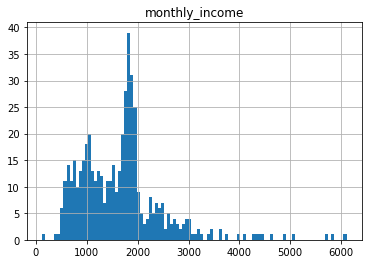

In [59]:
users.hist('monthly_income', bins=100)

Значения выше 3000 рублей - единичные. Посмотрим, есть ли какая-то тенденция по тарифам для этих выбросов.

In [60]:
users.query('monthly_income > 3000')['tariff'].value_counts()

smart    17
ultra     8
Name: tariff, dtype: int64

In [61]:
users['monthly_income'].describe()

count     500.000000
mean     1659.304029
std       823.341570
min       122.000000
25%      1044.593750
50%      1678.666667
75%      1931.887500
max      6107.000000
Name: monthly_income, dtype: float64

Выбросы пропорционально распределены среди тарифов, их можно убрать. Можно также удалить единичное минимальное значение в 122 рубля.  
Посмотрим на параметры распределения после удаления крайних значений.

In [62]:
users.query('130 < monthly_income <= 3000')['monthly_income'].describe()

count     474.000000
mean     1536.894282
std       593.827721
min       393.000000
25%      1035.723214
50%      1626.000000
75%      1893.058333
max      2995.666667
Name: monthly_income, dtype: float64

Создадим новый компактный датасет без выбросов, который и будем анализировать.

In [63]:
users_new=users.query('130 < monthly_income <= 3000').loc[:, ['user_id', 'city', 'tariff', 'monthly_calls_duration', 'monthly_messages_number', 'monthly_traffic', 'monthly_income']]
users_new.head(15)

,user_id,city,tariff,monthly_calls_duration,monthly_messages_number,monthly_traffic,monthly_income
0,1000,Краснодар,ultra,330.125000,62.0,13.625000,1761.250000
1,1001,Москва,smart,437.000000,0.0,16.500000,950.000000
2,1002,Стерлитамак,smart,223.000000,10.0,16.714286,1107.714286
3,1003,Москва,ultra,782.800000,76.0,11.800000,1748.600000
4,1004,Новокузнецк,ultra,128.000000,149.0,18.750000,1847.750000
5,1005,Набережные Челны,smart,564.333333,46.0,8.583333,826.333333
6,1006,Ульяновск,smart,326.818182,0.0,15.090909,905.090909
7,1007,Москва,smart,501.111111,25.0,15.000000,963.444444
8,1008,Челябинск,smart,350.000000,56.0,13.000000,2159.000000
9,1009,Пермь,smart,223.500000,11.0,18.000000,1352.500000


In [64]:
users_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 0 to 499
Data columns (total 7 columns):
user_id                    474 non-null int64
city                       474 non-null object
tariff                     474 non-null object
monthly_calls_duration     474 non-null float64
monthly_messages_number    474 non-null float64
monthly_traffic            474 non-null float64
monthly_income             474 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 29.6+ KB


## 2. Анализ основных характеристик распределений

### Абоненты тарифа Смарт

Посмотрим на распределения и базовые характеристики использования тарифов для абонентов тарифа "Смарт".  
Импортируем библиотеку numpy.

In [65]:
import numpy as np

Выведем гистограмму распределения для среднемесячного количества минут звонков.

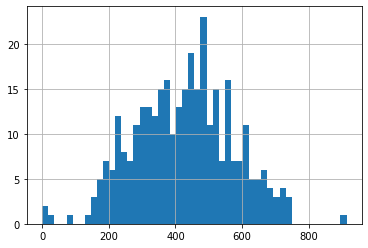

In [66]:
users_new.query('tariff == "smart"')['monthly_calls_duration'].hist(bins=50)

Большая часть абонентов находятся в диапазоне от 150 до 750 минут.  
Посмотрим на другие параметры распределения.

In [67]:
users_new.query('tariff == "smart"')['monthly_calls_duration'].describe()

count    333.000000
mean     425.638553
std      147.348197
min        0.000000
25%      322.000000
50%      433.666667
75%      525.666667
max      913.500000
Name: monthly_calls_duration, dtype: float64

Рассчитаем дисперсию и стандартное отклонение с помощью методов из библиотеки numpy, выведем еще раз среднее.

In [68]:
mean_smart_calls = users_new.query('tariff == "smart"')['monthly_calls_duration'].mean()
variation_smart_calls = np.var(users_new.query('tariff == "smart"')['monthly_calls_duration'])
std_smart_calls = np.std(users_new.query('tariff == "smart"')['monthly_calls_duration'])
print("Среднее значение среднемесячной длительности звонков абонентов тарифа Смарт: {:.2f}".format(mean_smart_calls))
print("Дисперсия среднемесячной длительности звонков абонентов тарифа Смарт: {:.2f}".format(variation_smart_calls))
print("Стандартное отклонение среднемесячной длительности звонков абонентов тарифа Смарт: {:.2f}".format(std_smart_calls))

Среднее значение среднемесячной длительности звонков абонентов тарифа Смарт: 425.64
Дисперсия среднемесячной длительности звонков абонентов тарифа Смарт: 21646.29
Стандартное отклонение среднемесячной длительности звонков абонентов тарифа Смарт: 147.13


В среднем, абоненты тарифа Смарт совершают 425 минут звонков в месяц (около 14 минут в день), что меньше ограничений тарифа.  
Подавляющая часть значений попадают в диапазон +- 3 сигмы.

Проанализируем ситуацию со среднемесячным количеством сообщений.

count    333.000000
mean      32.131630
std       26.299765
min        0.000000
25%       11.000000
50%       27.000000
75%       48.000000
max      118.000000
Name: monthly_messages_number, dtype: float64

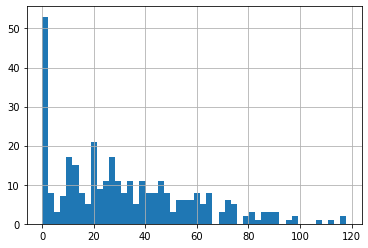

In [69]:
users_new.query('tariff == "smart"')['monthly_messages_number'].hist(bins=50)
users_new.query('tariff == "smart"')['monthly_messages_number'].describe()

Присутствует достаточно большой разброс значений по количеству сообщений - от нуля до 120.  
В среднем, абоненты отправляют одно сообщение в день.

In [70]:
mean_smart_messages = users_new.query('tariff == "smart"')['monthly_messages_number'].mean()
variation_smart_messages = np.var(users_new.query('tariff == "smart"')['monthly_messages_number'])
std_smart_messages = np.std(users_new.query('tariff == "smart"')['monthly_messages_number'])
print("Среднее значение среднемесячного количества сообщений абонентов тарифа Смарт: {:.2f}".format(mean_smart_messages))
print("Дисперсия среднемесячного количества сообщений абонентов тарифа Смарт: {:.2f}".format(variation_smart_messages))
print("Стандартное отклонение среднемесячного количества сообщений абонентов тарифа Смарт: {:.2f}".format(std_smart_messages))

Среднее значение среднемесячного количества сообщений абонентов тарифа Смарт: 32.13
Дисперсия среднемесячного количества сообщений абонентов тарифа Смарт: 689.60
Стандартное отклонение среднемесячного количества сообщений абонентов тарифа Смарт: 26.26


Видно, что среднемесячное количество сообщений - величина весьма вариабельная.  
Стандартное отклонение сопоставимо со средним значением, тогда как для минут разговора оно было почти в три раза меньше среднего.

Посмотрим на распределение среднемесячного трафика мобильного интернета.

count    333.000000
mean      16.113116
std        3.365947
min        5.727273
25%       14.000000
50%       16.200000
75%       18.400000
max       25.500000
Name: monthly_traffic, dtype: float64
Среднее значение среднемесячного интернет-трафика абонентов тарифа Смарт: 16.11
Дисперсия среднемесячного интернет-трафика абонентов тарифа Смарт: 11.30
Стандартное отклонение среднемесячного интернет-трафика абонентов тарифа Смарт: 3.36


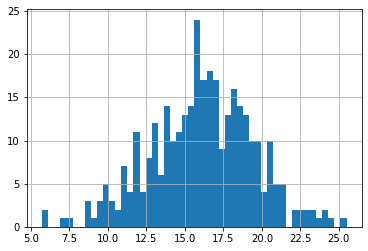

In [71]:
users_new.query('tariff == "smart"')['monthly_traffic'].hist(bins=50)
print(users_new.query('tariff == "smart"')['monthly_traffic'].describe())
mean_smart_traffic = users_new.query('tariff == "smart"')['monthly_traffic'].mean()
variation_smart_traffic = np.var(users_new.query('tariff == "smart"')['monthly_traffic'])
std_smart_traffic = np.std(users_new.query('tariff == "smart"')['monthly_traffic'])
print("Среднее значение среднемесячного интернет-трафика абонентов тарифа Смарт: {:.2f}".format(mean_smart_traffic))
print("Дисперсия среднемесячного интернет-трафика абонентов тарифа Смарт: {:.2f}".format(variation_smart_traffic))
print("Стандартное отклонение среднемесячного интернет-трафика абонентов тарифа Смарт: {:.2f}".format(std_smart_traffic))

Распределение интернет-трафика выглядит близким к нормальному, с небольшой скошенностью влево.  
Средний помесячный трафик превышает ограничения тарифа. При этом вариабельность величины невелика: стандартное отклонение почти в 5 раз меньше, чем среднее.

Проанализируем также значения среднемесячной выручки.

count     333.000000
mean     1357.362694
std       582.634953
min       393.000000
25%       910.800000
50%      1230.250000
75%      1750.750000
max      2995.666667
Name: monthly_income, dtype: float64
Среднее значение среднемесячной выручки абонентов тарифа Смарт: 1357.36
Дисперсия среднемесячной выручки абонентов тарифа Смарт: 338444.08
Стандартное отклонение среднемесячной выручки абонентов тарифа Смарт: 581.76


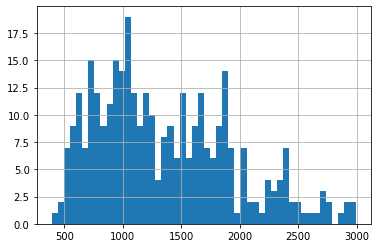

In [72]:
users_new.query('tariff == "smart"')['monthly_income'].hist(bins=50)
print(users_new.query('tariff == "smart"')['monthly_income'].describe())
mean_smart_income = users_new.query('tariff == "smart"')['monthly_income'].mean()
variation_smart_income = np.var(users_new.query('tariff == "smart"')['monthly_income'])
std_smart_income = np.std(users_new.query('tariff == "smart"')['monthly_income'])
print("Среднее значение среднемесячной выручки абонентов тарифа Смарт: {:.2f}".format(mean_smart_income))
print("Дисперсия среднемесячной выручки абонентов тарифа Смарт: {:.2f}".format(variation_smart_income))
print("Стандартное отклонение среднемесячной выручки абонентов тарифа Смарт: {:.2f}".format(std_smart_income))

Среднее значение выручки больше медианы, что свидетельствует о скошенности распределения вправо.  
В среднем оператор зарабатывает 1200-1300 рублей с каждого абонента в месяц, но есть и те, кто платят более 2000.

### Абоненты тарифа Ультра

Посмотрим на распределения аналогичных величин для абонентов тарифа Ультра.

count     141.000000
mean      531.441921
std       292.452056
min         0.000000
25%       326.500000
50%       526.888889
75%       744.333333
max      1209.909091
Name: monthly_calls_duration, dtype: float64
Среднее значение среднемесячной длительности звонков абонентов тарифа Ультра: 531.44
Дисперсия среднемесячной длительности звонков абонентов тарифа Ультра: 84921.62
Стандартное отклонение среднемесячной длительности звонков абонентов тарифа Ультра: 291.41


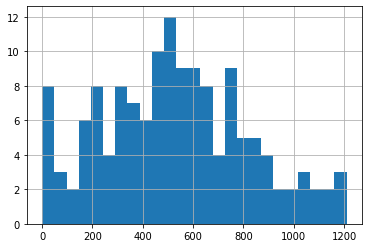

In [73]:
users_new.query('tariff == "ultra"')['monthly_calls_duration'].hist(bins=25)
print(users_new.query('tariff == "ultra"')['monthly_calls_duration'].describe())
mean_ultra_calls = users_new.query('tariff == "ultra"')['monthly_calls_duration'].mean()
variation_ultra_calls = np.var(users_new.query('tariff == "ultra"')['monthly_calls_duration'])
std_ultra_calls = np.std(users_new.query('tariff == "ultra"')['monthly_calls_duration'])
print("Среднее значение среднемесячной длительности звонков абонентов тарифа Ультра: {:.2f}".format(mean_ultra_calls))
print("Дисперсия среднемесячной длительности звонков абонентов тарифа Ультра: {:.2f}".format(variation_ultra_calls))
print("Стандартное отклонение среднемесячной длительности звонков абонентов тарифа Ультра: {:.2f}".format(std_ultra_calls))

При том, что средние значения ежемесячного количества минут пользователей тарифов Смарт и Ультра отличаются не очень сильно (425 и 531), стандартное отклонение (то есть разброс) различается вдвое, поскольку среди абонентов тарифа Ультра есть заметная группа говорящих очень много (более 25 минут в день).

count    141.000000
mean      53.293046
std       46.120953
min        0.000000
25%       18.000000
50%       44.000000
75%       82.000000
max      192.000000
Name: monthly_messages_number, dtype: float64
Среднее значение среднемесячного количества сообщений абонентов тарифа Ультра: 53.29
Дисперсия среднемесячного количества сообщений абонентов тарифа Ультра: 2112.06
Стандартное отклонение среднемесячного количества сообщений абонентов тарифа Ультра: 45.96


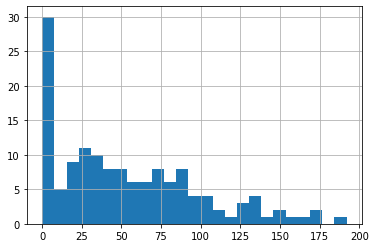

In [74]:
users_new.query('tariff == "ultra"')['monthly_messages_number'].hist(bins=25)
print(users_new.query('tariff == "ultra"')['monthly_messages_number'].describe())
mean_ultra_messages = users_new.query('tariff == "ultra"')['monthly_messages_number'].mean()
variation_ultra_messages = np.var(users_new.query('tariff == "ultra"')['monthly_messages_number'])
std_ultra_messages = np.std(users_new.query('tariff == "ultra"')['monthly_messages_number'])
print("Среднее значение среднемесячного количества сообщений абонентов тарифа Ультра: {:.2f}".format(mean_ultra_messages))
print("Дисперсия среднемесячного количества сообщений абонентов тарифа Ультра: {:.2f}".format(variation_ultra_messages))
print("Стандартное отклонение среднемесячного количества сообщений абонентов тарифа Ультра: {:.2f}".format(std_ultra_messages))

Пользователи тарифа Ультра отправляют достаточно много сообщений (больше чем абоненты Смарта), при этом разброс данных также велик: сопоставимы значения среднего и стандартного отклонения.

count    141.000000
mean      18.878974
std        7.911016
min        0.000000
25%       13.625000
50%       18.333333
75%       25.000000
max       35.375000
Name: monthly_traffic, dtype: float64
Среднее значение среднемесячного интернет-трафика абонентов тарифа Ультра: 18.88
Дисперсия среднемесячного интернет-трафика абонентов тарифа Ультра: 62.14
Стандартное отклонение среднемесячного кинтернет-трафика абонентов тарифа Ультра: 7.88


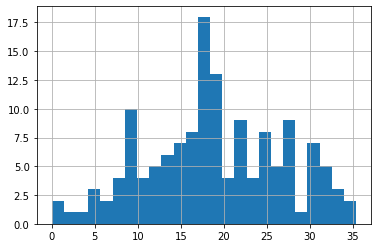

In [75]:
users_new.query('tariff == "ultra"')['monthly_traffic'].hist(bins=25)
print(users_new.query('tariff == "ultra"')['monthly_traffic'].describe())
mean_ultra_traffic = users_new.query('tariff == "ultra"')['monthly_traffic'].mean()
variation_ultra_traffic = np.var(users_new.query('tariff == "ultra"')['monthly_traffic'])
std_ultra_traffic = np.std(users_new.query('tariff == "ultra"')['monthly_traffic'])
print("Среднее значение среднемесячного интернет-трафика абонентов тарифа Ультра: {:.2f}".format(mean_ultra_traffic))
print("Дисперсия среднемесячного интернет-трафика абонентов тарифа Ультра: {:.2f}".format(variation_ultra_traffic))
print("Стандартное отклонение среднемесячного кинтернет-трафика абонентов тарифа Ультра: {:.2f}".format(std_ultra_traffic))

Любопытно, что большинство абонентов Ультра не выбирают трафик, заложенный в тариф (30Гб).  
Среднее близко к медиане, что говорит об отсутствии серьезных скосов в распределении.

count     141.000000
mean     1960.894415
std       358.680163
min      1069.000000
25%      1782.857143
50%      1869.214286
75%      1971.428571
max      2995.000000
Name: monthly_income, dtype: float64
Среднее значение среднемесячной выручки абонентов тарифа Ультра: 1960.89
Дисперсия среднемесячной выручки абонентов тарифа Ультра: 127739.04
Стандартное отклонение среднемесячной выручки абонентов тарифа Ультра: 357.41


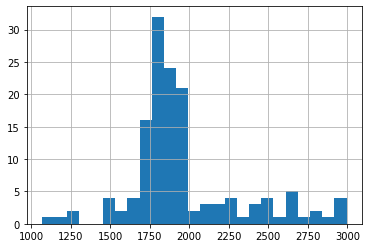

In [76]:
users_new.query('tariff == "ultra"')['monthly_income'].hist(bins=25)
print(users_new.query('tariff == "ultra"')['monthly_income'].describe())
mean_ultra_income = users_new.query('tariff == "ultra"')['monthly_income'].mean()
variation_ultra_income = np.var(users_new.query('tariff == "ultra"')['monthly_income'])
std_ultra_income = np.std(users_new.query('tariff == "ultra"')['monthly_income'])
print("Среднее значение среднемесячной выручки абонентов тарифа Ультра: {:.2f}".format(mean_ultra_income))
print("Дисперсия среднемесячной выручки абонентов тарифа Ультра: {:.2f}".format(variation_ultra_income))
print("Стандартное отклонение среднемесячной выручки абонентов тарифа Ультра: {:.2f}".format(std_ultra_income))

Поскольку заметная часть абонентов тарифа Ультра укладываются в ограничения тарифа, разброс распределения не очень велик.

## 3. Проверка гипотез

### Сравнение средней выручки абонентов различных тарифов

Для начала сформулируем нулевую и альтернативную гипотезы:  
    а) нулевая гипотеза - средние значения выручки абонентов тарифов Смарт и Ультра не отличаются  
    в) альтернативная гипотеза - средние значения выручки абонентов тарифов Смарт и Ультра отличаются  
    
Поскольку выборки не являются зависимыми (группы абонентов различны) будем использовать для проверки гипотез метод scipy.stats.ttest_ind, для чего импортируем библиотеку stat.  
Критический уровень значимости alpha зададим как 0.05.

In [77]:
from scipy import stats as st

smart_monthly_income = users_new.query('tariff == "smart"')['monthly_income']
ultra_monthly_income = users_new.query('tariff == "ultra"')['monthly_income']

alpha = .05

results = st.ttest_ind(smart_monthly_income, ultra_monthly_income)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 8.133108820404235e-27
Отвергаем нулевую гипотезу


Таким образом, мы видим, что среднемесячная выручка абонентов тарифов Смарт и Ультра отличаются, причем из предыдущего анализа мы даже знаем как: абоненты тарифа Ультра платят значимо больше.

### Сравнение средней выручки абонентов из Москвы и из других регионов

Для начала посмотрим на распределения выручки по этим двум стратам.

count      96.000000
mean     1509.814865
std       594.615087
min       484.000000
25%      1025.160714
50%      1664.410714
75%      1906.181548
max      2901.375000
Name: monthly_income, dtype: float64
Среднее значение среднемесячной выручки абонентов из Москвы: 1509.81
Дисперсия среднемесячной выручки абонентов из Москвы: 349884.11
Стандартное отклонение среднемесячной выручки абонентов из Москвы: 591.51


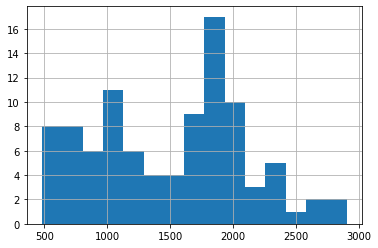

In [78]:
users_new.query('city == "Москва"')['monthly_income'].hist(bins=15)
print(users_new.query('city == "Москва"')['monthly_income'].describe())
mean_msk_income = users_new.query('city == "Москва"')['monthly_income'].mean()
variation_msk_income = np.var(users_new.query('city == "Москва"')['monthly_income'])
std_msk_income = np.std(users_new.query('city == "Москва"')['monthly_income'])
print("Среднее значение среднемесячной выручки абонентов из Москвы: {:.2f}".format(mean_msk_income))
print("Дисперсия среднемесячной выручки абонентов из Москвы: {:.2f}".format(variation_msk_income))
print("Стандартное отклонение среднемесячной выручки абонентов из Москвы: {:.2f}".format(std_msk_income))

Среднемесячная выручка с абонентов из Москвы составляет в среднем около 1500 рублей, причем стандартное отклонение достаточно большое.

count     378.000000
mean     1543.771594
std       594.219469
min       393.000000
25%      1035.787500
50%      1620.700000
75%      1889.531250
max      2995.666667
Name: monthly_income, dtype: float64
Среднее значение среднемесячной выручки абонентов из регионов: 1543.77
Дисперсия среднемесячной выручки абонентов из регионов: 352162.66
Стандартное отклонение среднемесячной выручки абонентов из регионов: 593.43


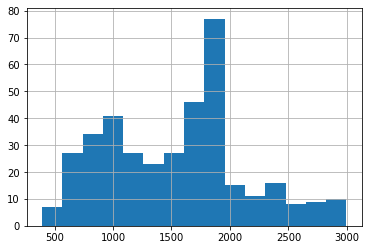

In [79]:
users_new.query('city != "Москва"')['monthly_income'].hist(bins=15)
print(users_new.query('city != "Москва"')['monthly_income'].describe())
mean_reg_income = users_new.query('city != "Москва"')['monthly_income'].mean()
variation_reg_income = np.var(users_new.query('city != "Москва"')['monthly_income'])
std_reg_income = np.std(users_new.query('city != "Москва"')['monthly_income'])
print("Среднее значение среднемесячной выручки абонентов из регионов: {:.2f}".format(mean_reg_income))
print("Дисперсия среднемесячной выручки абонентов из регионов: {:.2f}".format(variation_reg_income))
print("Стандартное отклонение среднемесячной выручки абонентов из регионов: {:.2f}".format(std_reg_income))

Значения средних размеров выручки в Москве и регионах на первый взгляд близки. Проверим гипотезы.

Для начала сформулируем нулевую и альтернативную гипотезы:  
    а) нулевая гипотеза - средние значения выручки абонентов в Москве и регионах не отличаются  
    в) альтернативная гипотеза - средние значения выручки абонентов в Москве и регионах отличаются  
    
Поскольку выборки не являются зависимыми (группы абонентов различны) будем использовать для проверки гипотез метод scipy.stats.ttest_ind.  
Критический уровень значимости alpha зададим как 0.05.

In [80]:
msk_monthly_income = users_new.query('city == "Москва"')['monthly_income']
regions_monthly_income = users_new.query('city != "Москва"')['monthly_income']

alpha = .05

results = st.ttest_ind(msk_monthly_income, regions_monthly_income)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.6173541782461573
Не получилось отвергнуть нулевую гипотезу


Как мы и ожидали, среднемесячный размер выручки у абонентов в Москве и регионах статистически значимо не отличается

### Результаты анализа

После анализа данных можно сделать следующие выводы.  
1. Заметная часть абонентов тарифа Смарт укладываются в ограничения тарифа по количеству минут в месяц. Вместе с тем, многие разговаривают заметно больше, что позволяет оператору Мегалайн зарабатывать сверх абонентской платы.  
2. Присутствует достаточно большой разброс значений по количеству сообщений, отправляемых абонентами тарифа Смарт - от нуля до 120.  В среднем, абоненты отправляют одно сообщение в день, и в большинстве случаев укладываются в ограничения тарифа.  
3. Более половины пользователей тарифа Смарт превышают лимит по мобильному интернету, и учитывая относительно высокую стоимость этой услуги, именно использование интернета позволяет Мегалайну зарабатывать на абонентах этого тарифа сверх абонентской платы.  
4. Абоненты тарифа Ультра больше разговаривают и больше отправляют сообщений, но практически никогда не выходят за внушительные лимиты тарифа.  
5. Любопытно, что потребляемый абонентами тарифа интернет трафик слабо отличается от аналогичных значений у абонентов тарифа Смарт.  
6. Мы выявили, что оператор Мегалайн зарабатывает в среднем больше на пользователях тарифа Ультра, во многом благодаря высокой абонентской плате.  
7. При этом значимых различий в выручке среди абонентов в Москве и регионах не выявлено.